#Step 1: Import the necessary libraries:

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


#Step 2: Load the dataset from a CSV file:

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML_Data/heart.csv')
data.head()

,age,sex,chestpain,restBPS,cholestoral,fastingBloodSugar,restingECG,maximumHeartrate,exerciseInducdAngina,oldpeak,slope,majorVessels,Thelassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Step 3: Data cleaning and processing
# Perform any necessary data preprocessing steps, such as handling missing values or scaling features
# (For this example, let's assume the data is already preprocessed)
# Then separate the features (X) and target variable (y)

In [ ]:
X = data.drop('target', axis=1)
y = data['target']


print(X,y)

     age  sex  chestpain  restBPS  cholestoral  fastingBloodSugar  restingECG  \
0     63    1          3      145          233                  1           0   
1     37    1          2      130          250                  0           1   
2     41    0          1      130          204                  0           0   
3     56    1          1      120          236                  0           1   
4     57    0          0      120          354                  0           1   
..   ...  ...        ...      ...          ...                ...         ...   
298   57    0          0      140          241                  0           1   
299   45    1          3      110          264                  0           1   
300   68    1          0      144          193                  1           1   
301   57    1          0      130          131                  0           1   
302   57    0          1      130          236                  0           0   

     maximumHeartrate  exer

#Step 4: Exploratory Data Analysis (EDA) and Visualization


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    int64  
 1   sex                   303 non-null    int64  
 2   chestpain             303 non-null    int64  
 3   restBPS               303 non-null    int64  
 4   cholestoral           303 non-null    int64  
 5   fastingBloodSugar     303 non-null    int64  
 6   restingECG            303 non-null    int64  
 7   maximumHeartrate      303 non-null    int64  
 8   exerciseInducdAngina  303 non-null    int64  
 9   oldpeak               303 non-null    float64
 10  slope                 303 non-null    int64  
 11  majorVessels          303 non-null    int64  
 12  Thelassemia           303 non-null    int64  
 13  target                303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Data Stat

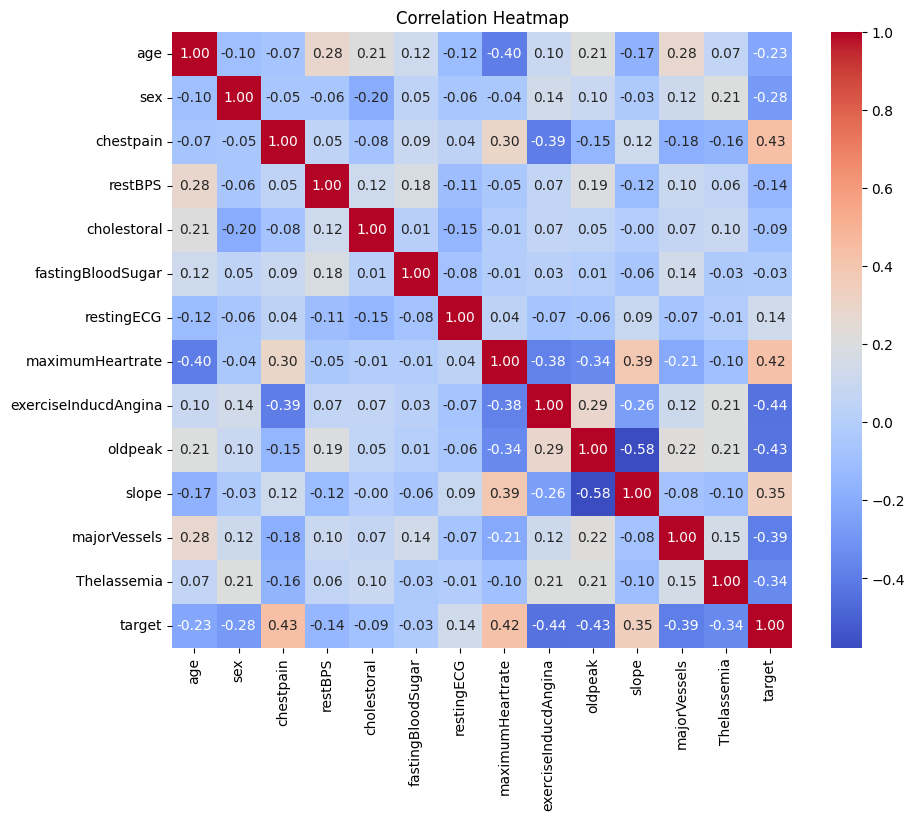

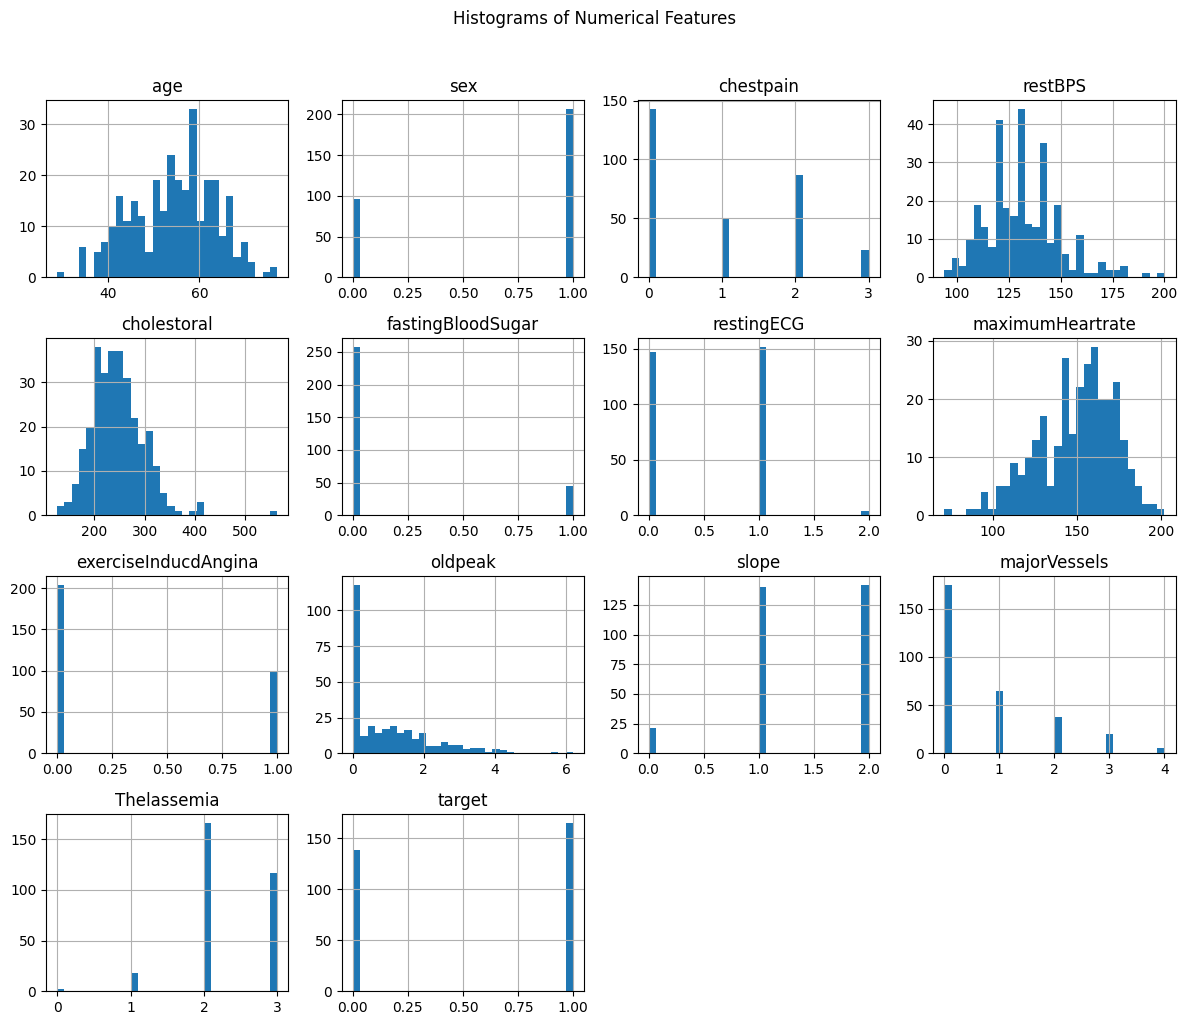

In [ ]:
# Step : Data Summary
print("\nData Info:")
print(data.info())
print("\nData Statistics:")
print(data.describe())



# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Histograms of numerical features
data.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()



#Step 5: Train and test data split

In [ ]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #randon state= sets the random seed for the random number generator.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Model Training

In [ ]:
# Initialize the random forest classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

#Step 6: Feature Importance Calculation

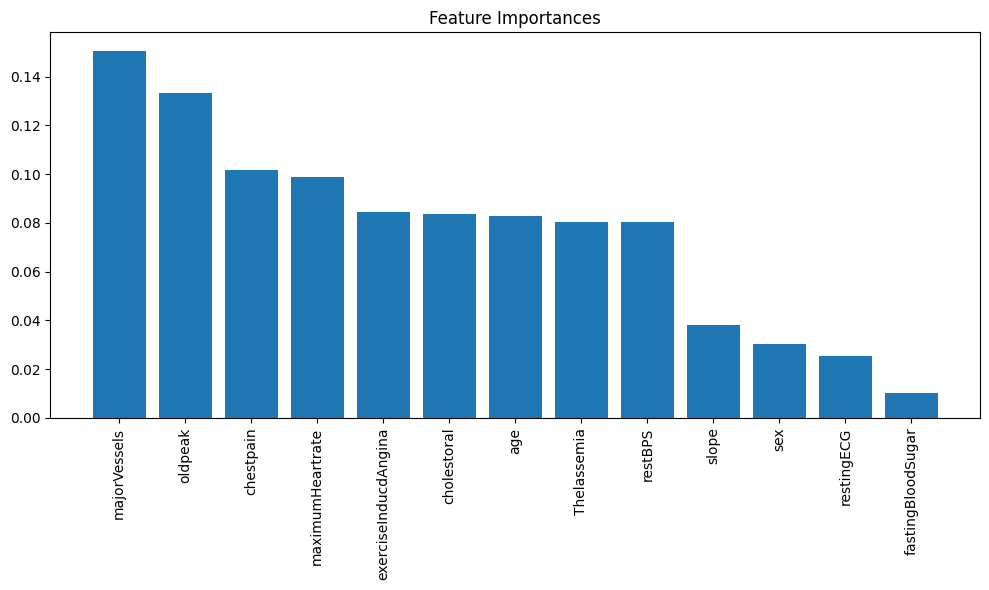

In [ ]:
# Calculate feature importance
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

#  Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


#Step 7: Model training with cross validation

Cross-Validation Scores: [0.83606557 0.8852459  0.78688525 0.83333333 0.8       ]
Mean Cross-Validation Score: 0.8283060109289618


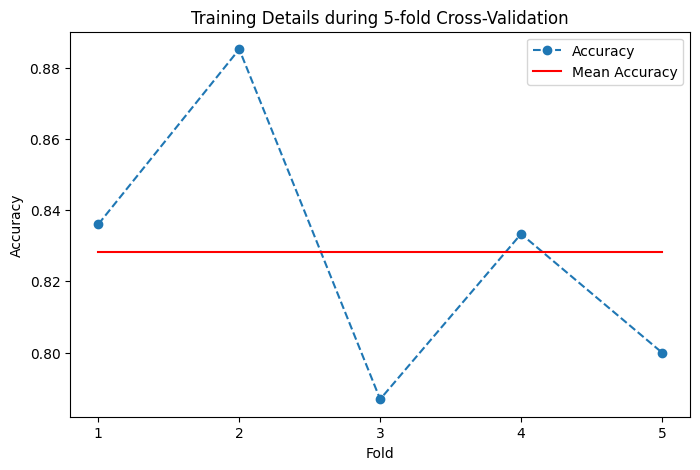

In [ ]:
# Model training with 5-fold cross-validation
rf_classifier = RandomForestClassifier()
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(rf_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()

#Step 8: Model testing and evaluation

# Train test graphs

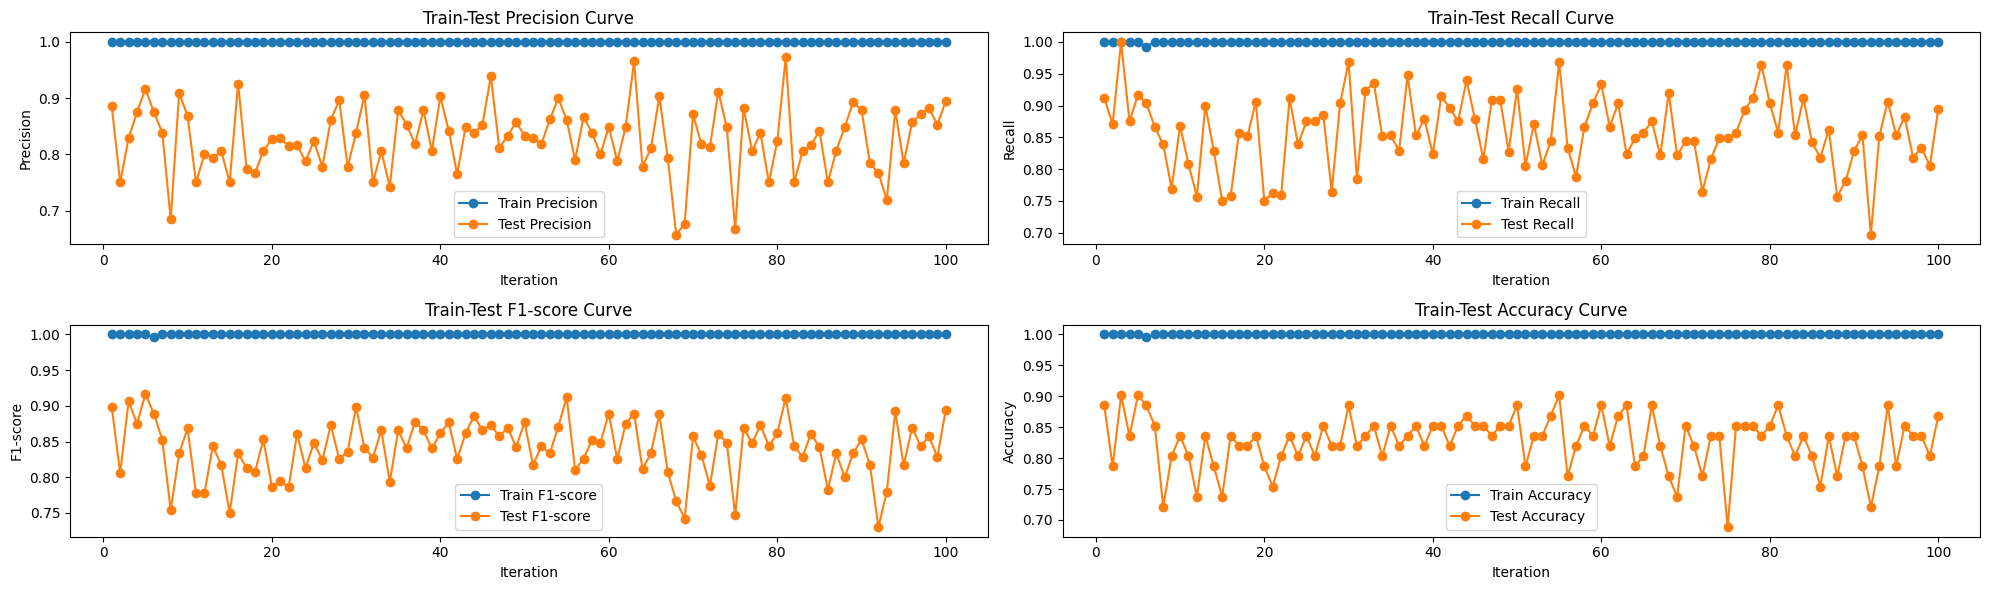

In [ ]:
data = data

# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Step 3: Model training
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))

    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))

    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


**Precision** focuses on the accuracy of positive predictions.
- **Recall** focuses on the ability to correctly identify positive instances.
- **F1 Score** balances precision and recall, providing a single metric for evaluation.


Accuracy: 0.8688524590163934
Precision: 0.8947368421052632
Recall: 0.8947368421052632
F1-score: 0.8947368421052632
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.89      0.89      0.89        38

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



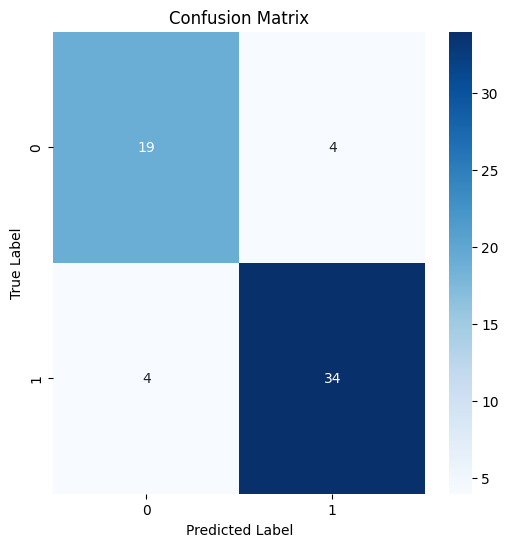

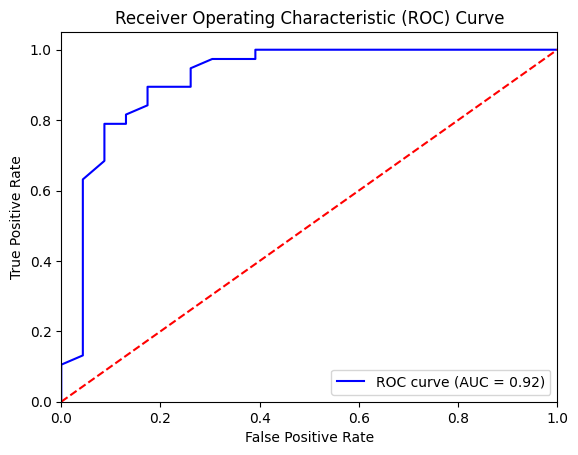

In [ ]:
# Model testing and evaluation
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)





# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Calculate ROC curve and AUC
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# User Input for Prediction
print("Please enter the values for the following features:")
user_input = {}
for feature in X.columns:
    user_input[feature] = float(input(f"{feature}: "))

# Convert user input into DataFrame and predict
user_data = pd.DataFrame(user_input, index=[0])
prediction = rf_classifier.predict(user_data)

if prediction[0] == 1:
    print("The model predicts that the person is likely to have heart disease .")
else:
    print("The model predicts that the person is unlikely to have heart disease.")

Please enter the values for the following features:
age: 23
sex: 1
chestpain: 1
restBPS: 120
cholestoral: 160
fastingBloodSugar: 0
restingECG: 0
maximumHeartrate: 140
exerciseInducdAngina: 0
oldpeak: 0
slope: 0
majorVessels: 1
Thelassemia: 0
The model predicts that the person is likely to have heart disease .
